## <center>Neural Networks and Deep Learning </center>
### <center>3rd Project - Using Auto-Encoder network to construct the next digit on MNIST
#### <center>Author : Anastasios Gerontopoulos - AEM: 9682 </center>

#### -> In this project we will explore deep learning architectures to build an Auto-encoder network.<br> For a given image of MNIST representing a digit, we will encode, and then decode to reconstruct the next digit. It is a binary classification problem, and we will represent odd numbers as class 0 and even numbers as class 1.<br>-> This notebook is completely functional and can be run through cell after cell to produce the results.<br>-> All the results, plots,conclusions and code are included in this notebook. <br>-> Python version is 3.9 <br>-> Modules used are numpy, matplotlib, tensorflow, scikit-learn, and time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import datasets, layers, losses
from keras import Input, Sequential, Model
from time import time_ns

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print(X_train.shape, y_train.shape)                                ### print the shape of the data to get a first insight

X_train, X_test = X_train /255.0 , X_test/255.0                    ### scale the pixel values.

(60000, 28, 28) (60000,)


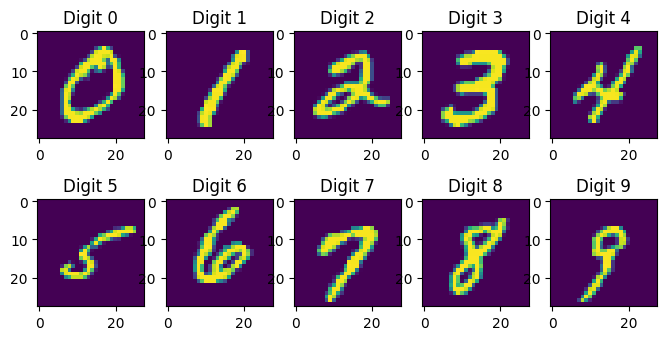

In [3]:
### We will plot the images here, to see what they look like.

%matplotlib inline

fig, axis = plt.subplots(2,5 ,figsize = (8,4))
digit  = 0
digit_indexes = np.array([], dtype='int')
for i in range(100):                          ### customly used 100 here to make sure we get all the different digits.
    if (digit < 5):
        j = 0
    else:
        j = 1

    if (y_train[i] == digit):
        axis[j, digit - j * 5].imshow(X_train[i])
        axis[j, digit - j * 5].set_title("Digit " + str(digit))
        digit = digit +1
        digit_indexes = np.append(digit_indexes, i)        ### keep the indexes of the images on the training set.


##### Before we start defining the neural network architecture, we need to select representative digits for the y set. for each image of the training set (X_train), we need to define the ground truth of the image, which will be another image representing the next digit. For the ground truths we will select the digit images that we plotted above. This is done because we needed to do it automatically, so the notebook can always run properly.

In [4]:
# Defining the  y_train, y_test datasets (reconstruction targets).

y_train_images = X_train.copy()
y_test_images = X_test.copy()

# Reconstruction digit variable defines which digit is the next one.

for i in range(0, y_train.shape[0]):
    reconstruction_digit = 0
    if (y_train[i] == 9):
        reconstruction_digit = 0
    else:
        reconstruction_digit = y_train[i] + 1
    
    y_train_images[i] = X_train[digit_indexes[reconstruction_digit]]

# Lets do the same for the y_test dataset.

for i in range(0, y_test.shape[0]):
    reconstruction_digit = 0
    if (y_test[i] == 9):
        reconstruction_digit = 0
    else:
        reconstruction_digit = y_test[i] + 1
    
    y_test_images[i] = X_train[digit_indexes[reconstruction_digit]]




#### After testing that this algorithm works properly, and we have defined well the y target datasets for the problem, we will go on to build the network. Auto-encoder network supports unsupervised type of learning, since it does not require labels to learn the patterns of the data.<br>It consists of two parts: the encoder, which copresses the input image into a single vector, and the decoder, which will manage to decode the compressed vector into a 28 x 28 image again. <br> The encoder and decoder are both MultiLayer Perceptron networks, of simple architecture, since they contain only Dense layers and dropout. The encoder has a Flatten layer on its input, to vectorize the images to 784 sized vector in order to be processed by the Dense layers after. Dropout values are set to 0.3 to prevent overfitting. The decoder has an output Dense layer with 784 neurons, with sigmoid activation, and it is followed by a Reshape layer to reshape the image to 28 x 28 dimensions. <br> THis architecture is very simple, and we built it using Tensorflow and Keras libraries.


In [7]:
# Encoder custom architecture using Tensorflow and Keras API (Sequential model).

def define_encoder():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu'))
    return model

# Decoder custom architecture using Tensorflow and Keras API (Sequential model).

def define_decoder():
    model = Sequential()
    model.add(Input(shape=(64,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(784, activation='sigmoid'))
    model.add(layers.Reshape(target_shape=(28, 28)))
    return model


# Define the whole model using the Functional class from Keras API.
encoder = define_encoder()
decoder = define_decoder()

input_image = Input(shape=(28,28))
compressed_image = encoder(input_image)
output_image = decoder(compressed_image)

autoencoder_model = Model(inputs=input_image, outputs = output_image)

# Compile the model.
autoencoder_model.compile(optimizer = "adam", loss=losses.BinaryCrossentropy())



In [8]:
# Train the model for 30 epochs
erl = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = autoencoder_model.fit(X_train, y_train_images, batch_size=32, epochs=30, callbacks=[erl], validation_data=(X_test, y_test_images))

Epoch 1/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1138 - val_loss: 0.0768
Epoch 2/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0820 - val_loss: 0.0734
Epoch 3/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0780 - val_loss: 0.0732
Epoch 4/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0757 - val_loss: 0.0712
Epoch 5/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0747 - val_loss: 0.0721
Epoch 6/30
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0734 - val_loss: 0.0703
Epoch 7/30
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0724 - val_loss: 0.0699
Epoch 8/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0719 - val_loss: 0.0705
Epoch 9/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0712 - val_loss: 0.0699
Epoch 10/30
1875/1875 [==============================] - 29s 15m

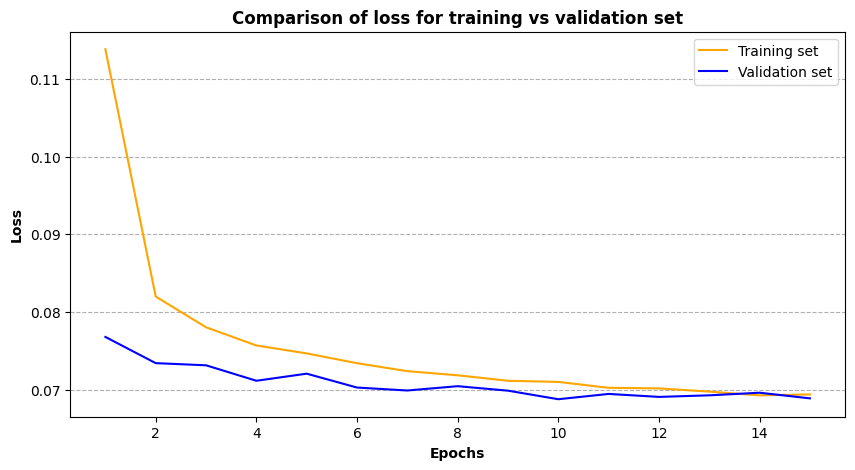

In [9]:
# Plot training loss vs validation loss at the same figure

X = np.arange(1,len(history.history["val_loss"]) + 1)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(X, history.history['loss'], color = 'orange', label = "Training set")
plt.plot(X, history.history['val_loss'], color = 'blue', label = "Validation set")
ax.yaxis.grid(linestyle = '--')
plt.title("Comparison of loss for training vs validation set", fontweight = "bold")
plt.xlabel("Epochs", fontweight = "bold")
plt.ylabel("Loss", fontweight = "bold")
plt.legend()
plt.show()

#### Training stopped at the 15th epoch, due to the EarlyStopping callback we have defined: if validation loss does not increases after 5 consecutive epochs, training stops and the best weights are restored to the model. This is a very useful tool that helps us save time and computational resources. It seems that this particular architecture that we choosed, together with these particular Y target datasets that we defined, have reached a peak. <br> What we can see in the figure plotted above is that, even from the first epoch, validation loss is pretty small.<br> During training epochs, it increases and decreases again, indicating that training maybe should have stopped before the 15th training.

1/1 [==============================] - 0s 26ms/step


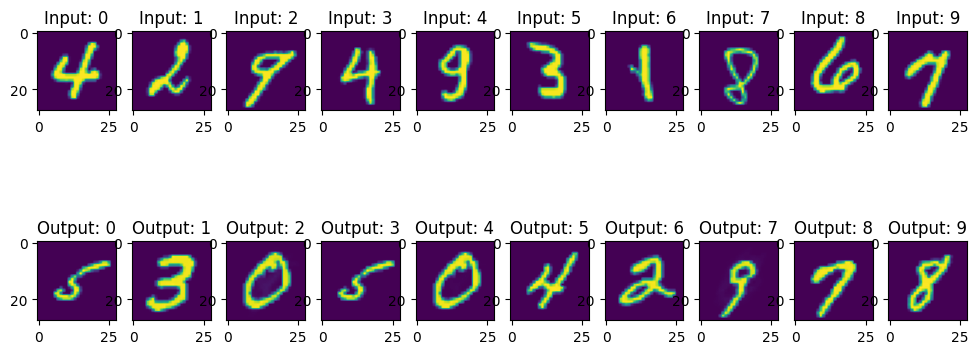

In [17]:
# Visualization of the digit reconstruction.
# At the first row of the figure, we can see the input images.
# At the bottom row, we can see the output images.

random_sample_indexes = np.random.randint(low=0, high=X_test.shape[0], size=10)

fig, axis = plt.subplots(2,10 ,figsize = (12,5))
for i in range(0, len(random_sample_indexes)):
    axis[0,i].imshow(X_test[random_sample_indexes[i]])
    axis[0,i].set_title("Input: "+ str(i))
    axis[1,i].imshow(autoencoder_model.predict( np.array([X_test[random_sample_indexes[i]]]) ).reshape(28,28) )
    axis[1,i].set_title("Output: "+str(i))

#### What we can see here is that, in every iteration that we run the above cell, 10 random samples from the validation set are fed into the autoencoder, and images from the next digits are reconstructed successfully.

### <center> Section 2: Auto-Encoder VS PCA reconstruction </center>
#### In the next section of this project we must compare reconstruction with PCA with the autoencoder reconstruction proposed above. <br> However, we have one problem: with pca we can only reconstruct the same digits. Therefore, we will build and compile another autoencoder, which will be trained to reconstruct an image representing the same digit as the input, then we will do the same with PCA inverse transform and we will compare the results.

In [11]:
# Define the model, compile it and train it again with different Y target data.
# We only train it for 5 epochs because we need time to be comparable with PCA.
# In addition, validation loss does not decrease so much after every epoch to justify further training.

encoder_2 = define_encoder()
decoder_2 = define_decoder()

input_image_2 = Input(shape=(28,28))
compressed_image_2 = encoder_2(input_image_2)
output_image_2 = decoder_2(compressed_image_2)


autoencoder_model_2 = Model(inputs=input_image_2, outputs = output_image_2)
autoencoder_model_2.compile(optimizer='adam', loss=losses.BinaryCrossentropy())

start_time = time_ns()
history_2 = autoencoder_model_2.fit(X_train, X_train, batch_size=32, epochs=5, validation_data=(X_test, X_test))
autoencoder_training_time = time_ns() - start_time

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1963 - val_loss: 0.1586
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1704 - val_loss: 0.1510
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1659 - val_loss: 0.1480
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1635 - val_loss: 0.1459
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1619 - val_loss: 0.1438


In [12]:
# PCA attribute n_components will be set to 64 because we this is the size of the compressed vector that
# we chose for the Auto-Encoder model.
# First there is the need to reshape the 2-D images into 1-D vectors

X_train_vectorized = X_train.reshape(X_train.shape[0], 784)
X_test_vectorized = X_test.reshape(X_test.shape[0], 784)

from sklearn.decomposition import PCA

pca = PCA(n_components=64)

start_time_2 = time_ns()
pca.fit(X_train_vectorized)
PCA_train = pca.transform(X_train_vectorized)
PCA_test = pca.transform(X_test_vectorized)
pca_time = time_ns() - start_time_2

pca_reconstructed = pca.inverse_transform(PCA_test)

1/1 [==============================] - 0s 17ms/step


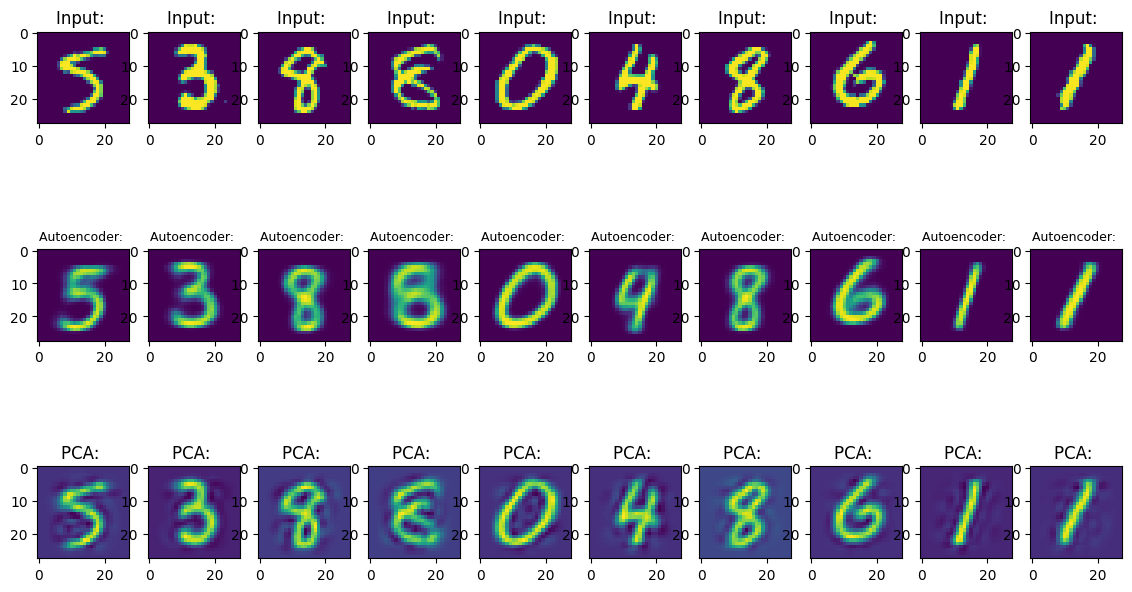

In [31]:
# Lets plot and compare the results:
# 10 random samples are selected every time we run this cell, and they are plotted:
# 1st line the original images from MNIST, second line the reconstructed images with our AutoEncoder and third line
# the reconstructed images with PCA.

random_sample_indexes_2 = np.random.randint(low=0, high=X_test.shape[0], size=10)

fig, axis = plt.subplots(3,10 ,figsize = (14,8))
for i in range(0, len(random_sample_indexes_2)):
    axis[0,i].imshow(X_test[random_sample_indexes_2[i]])
    axis[0,i].set_title("Input: ")
    axis[1,i].imshow(autoencoder_model_2.predict( np.array([X_test[random_sample_indexes_2[i]]]) ).reshape(28,28) )
    axis[1,i].set_title("Autoencoder: ", fontsize='9')
    axis[2,i].imshow( pca.inverse_transform( PCA_test[random_sample_indexes_2[i]] ).reshape(28,28) ) 
    axis[2,i].set_title("PCA: ")


##### Note: What we can observe in the above figure is that, autoencoder has difficulty in reconstructing digit 4, confusing it with 9, while PCA can reconstruct it better.

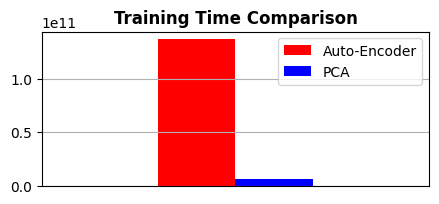

In [16]:
### Lets plot the training time for the two reconstruction techniques: 

fig, ax = plt.subplots(figsize = (5,2))

ax.bar(-0.1, autoencoder_training_time, width = 0.2, color = 'red', label = "Auto-Encoder")
ax.bar(0.1, pca_time, width = 0.2, color = 'blue', label = "PCA")
ax.set_title("Training Time Comparison", fontweight = "bold")
ax.yaxis.grid()
plt.legend()
ax.set_xlim(-0.5,0.5)

plt.tick_params(axis='x',  which='both', bottom=False,  top=False,  labelbottom=False) 


#### Conclusions: For a same compressed vector size (64) it seems that our proposed autoencoder performs much better than PCA. However, the training time for 5 epochs is much larger (1 epoch took ~27 seconds), while PCA took less than 5 seconds.<br> There is certainly a tradeoff between training time and reconstruction quality. An idea could be to increase PCA n_components and maybe have better results, but our goal is to reconstruct the MNIST images from a small size compressed vector.

### <center> Section 3: Another trial </center>
#### We are going to alter some hyperparameters to see what happens: <br> -> size of the compressed vector will be 32 (less information). <br> -> fewer neurons on the encoder network, as well on the decoder. <br> Lets try to see if this simpler architecture with less neurons can perform as well as the previous one.




In [18]:
# Encoder custom architecture using Tensorflow and Keras API (Sequential model).

def define_encoder_3():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(32, activation='relu'))
    return model

# Decoder custom architecture using Tensorflow and Keras API (Sequential model).

def define_decoder_3():
    model = Sequential()
    model.add(Input(shape=(32,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(784, activation='sigmoid'))
    model.add(layers.Reshape(target_shape=(28, 28)))
    return model


# Define the whole model using the Functional class from Keras API.
encoder_3 = define_encoder_3()
decoder_3 = define_decoder_3()

input_image_3 = Input(shape=(28,28))
compressed_image_3 = encoder_3(input_image_3)
output_image_3 = decoder_3(compressed_image_3)

autoencoder_model_3 = Model(inputs=input_image_3, outputs = output_image_3)

# Compile and train the model for 10 epochs.
autoencoder_model_3.compile(optimizer = "adam", loss=losses.BinaryCrossentropy())
history_3 = autoencoder_model_3.fit(X_train, y_train_images, batch_size=32, epochs=10, validation_data=(X_test, y_test_images))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1296 - val_loss: 0.0778
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0875 - val_loss: 0.0759
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0832 - val_loss: 0.0741
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0806 - val_loss: 0.0721
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0792 - val_loss: 0.0721
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0776 - val_loss: 0.0709
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0771 - val_loss: 0.0709
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0763 - val_loss: 0.0712
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0757 - val_loss: 0.0706
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.074

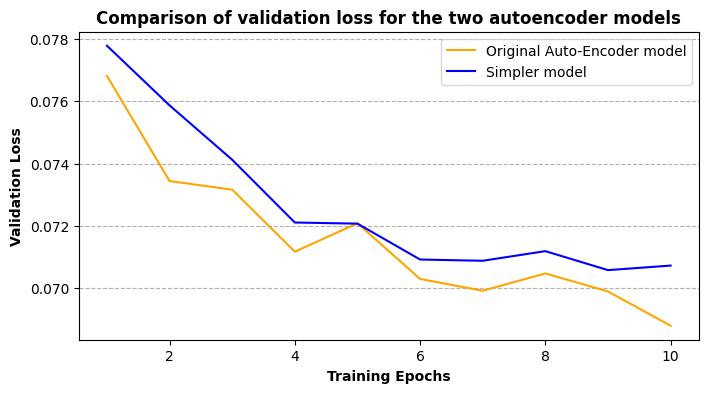

In [21]:
# Plot and compare the validation loss for the two models that we tried.

X = np.arange(1,len(history_3.history["val_loss"]) + 1)
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(X, history.history['val_loss'][0:10], color = 'orange', label = "Original Auto-Encoder model")
plt.plot(X, history_3.history['val_loss'], color = 'blue', label = "Simpler model")
ax.yaxis.grid(linestyle = '--')
plt.title("Comparison of validation loss for the two autoencoder models", fontweight = "bold")
plt.xlabel("Training Epochs", fontweight = "bold")
plt.ylabel("Validation Loss", fontweight = "bold")
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step


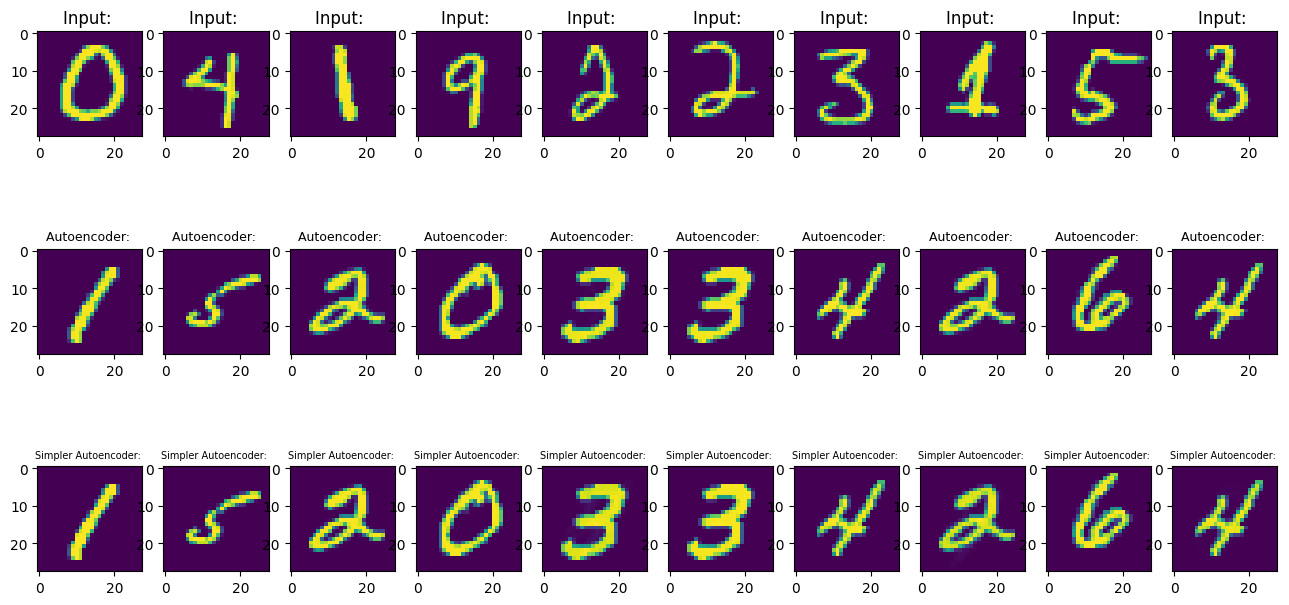

In [32]:
# Lets plot and compare the results:
# 10 random samples are selected every time we run this cell, and they are plotted:
# 1st line the original images from MNIST, second line the reconstructed next digits with our proposed AutoEncoder and third line
# the reconstructed next digits with the simpler model.

random_sample_indexes_3 = np.random.randint(low=0, high=X_test.shape[0], size=10)

fig, axis = plt.subplots(3,10 ,figsize = (16,8))
for i in range(0, len(random_sample_indexes)):
    axis[0,i].imshow(X_test[random_sample_indexes_3[i]])
    axis[0,i].set_title("Input: ")
    axis[1,i].imshow(autoencoder_model.predict( np.array([X_test[random_sample_indexes_3[i]]]) ).reshape(28,28) )
    axis[1,i].set_title("Autoencoder: ", fontsize='9')
    axis[2,i].imshow( autoencoder_model_3.predict( np.array([X_test[random_sample_indexes_3[i]]]) ).reshape(28,28) ) 
    axis[2,i].set_title("Simpler Autoencoder: ", fontsize='7')

#### Final conclusions: <br> -> It seems that the simpler model, which uses less neurons in the hidden layers, and keeps less information ( compressed vector length = 32) can perform as well as the most complex one. This can also be seen at the validation loss figures, where we see that the differences are pretty small. <br> -> This is easily interpreted because our problem is a simple one: the MNIST dataset is not complex, and do not contain lot of information. Another thing to be considered is that we used the same digit image for the y sets (same 1, same 2 etc), and this also reduced the complexity of the reconstruction problem. <br>
### <center> End of this notebook </center>